# Preparing Data

In [1]:
import pandas as pd
import numpy as np

dfs = []
for i in range(2017,2023):
    year_df = pd.read_csv(f"~/main/python/wqi-prediction/data/csv/{i}_lake_data.csv")
    year_df.insert(1,"Year",i)
    dfs.append(year_df)

df = pd.concat(dfs)
df

,STN Code,Year,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,...,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,2017,"PULICATE LAKE , NELLORE \nDIST.",LAKE,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,...,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,2017,"KONDACHARLA-AAVA LAKE, \nPARAWADA PHARMA CITY,...",LAKE,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,...,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,2017,"MER BEEL AT MADHABPUR, \nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,...,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,2017,"DALONI BEEL NEAR \nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,...,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,1263.0,2017,ELANGABEEL SYSTEM POND \n(CONNECTED TO R. KOLA...,POND,ASSAM,22.0,34.0,0.7,4.6,6.8,...,263.0,972.0,4.5,14.7,0.8,5.7,1100.0,3500.0,730.0,21000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2544.0,2022,SAHEBBANDH AT \nPURULIA,LAKE,WEST \nBENGAL,20,36,9.0,10.2,7.0,...,240,326,2.8,4.3,0.30,1.06,1100,4700,2100,11000
644,2522.0,2022,SINCHAL LAKE FOR \nDARJEELING,LAKE,WEST \nBENGAL,2,18,7.2,8.8,6.9,...,13,50,1.0,1.8,0.30,1.13,2,230,40,1600
645,5163.0,2022,"SUBHAS SAROBAR, \nBELAGHATA, KOLKATA",LAKE,WEST \nBENGAL,22,32,6.7,8.0,7.2,...,349,426,3.0,4.5,0.30,1.36,700,2300,1300,3500
646,2521.0,2022,"WATER RESERVIOR AT \nDELO LAKE, DARJELLING",LAKE,WEST \nBENGAL,8,26,7.0,8.5,7.0,...,16,38,1.0,1.2,0.30,1.17,70,3300,140,11000


In [2]:
#using only data of lakes
df = df[df["Type Water Body"]=="LAKE"]

#drop rows containing blank values
df = df.dropna()

#some entries in the pdf have - to represent a blank value so we must remove those as well
bad_vals = df.apply(lambda x:x=="-").any(axis=1)
bad_idx = bad_vals.index[bad_vals]
df = df.drop(bad_idx)

#replace below detection level with 0
df = df.replace("BDL",0)

df.reset_index(inplace=True,drop=True)
df

,STN Code,Year,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,...,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,2017,"PULICATE LAKE , NELLORE \nDIST.",LAKE,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,...,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,2017,"KONDACHARLA-AAVA LAKE, \nPARAWADA PHARMA CITY,...",LAKE,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,...,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,2017,"MER BEEL AT MADHABPUR, \nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,...,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,2017,"DALONI BEEL NEAR \nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,...,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,2557.0,2017,"KAWAR LAKE, BEGUSARAI, \nBIHAR",LAKE,BIHAR,19.0,32.0,5.4,8.0,7.2,...,222.0,325.0,2.1,2.8,0.0,0.0,7000.0,26000.0,15000.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,2544.0,2022,SAHEBBANDH AT \nPURULIA,LAKE,WEST \nBENGAL,20,36,9.0,10.2,7.0,...,240,326,2.8,4.3,0.30,1.06,1100,4700,2100,11000
1390,2522.0,2022,SINCHAL LAKE FOR \nDARJEELING,LAKE,WEST \nBENGAL,2,18,7.2,8.8,6.9,...,13,50,1.0,1.8,0.30,1.13,2,230,40,1600
1391,5163.0,2022,"SUBHAS SAROBAR, \nBELAGHATA, KOLKATA",LAKE,WEST \nBENGAL,22,32,6.7,8.0,7.2,...,349,426,3.0,4.5,0.30,1.36,700,2300,1300,3500
1392,2521.0,2022,"WATER RESERVIOR AT \nDELO LAKE, DARJELLING",LAKE,WEST \nBENGAL,8,26,7.0,8.5,7.0,...,16,38,1.0,1.2,0.30,1.17,70,3300,140,11000


In [3]:
#Required Columns
L = [
  "Min Temperature","Max Temperature","Min Dissolved Oxygen","Max Dissolved Oxygen",
  "Min pH","Max pH","Min Conductivity","Max Conductivity","Min BOD","Max BOD",
  "Min Nitrate N + Nitrite N","Max Nitrate N + Nitrite N","Min Fecal Coliform",
  "Max Fecal Coliform","Min Total Coliform","Max Total Coliform"
]
df[L] = df[L].apply(pd.to_numeric)

#dropping redundant columns
df = df.drop(columns=["Name of Monitoring Location","Type Water Body"])
df = df.astype({"STN Code":int})
df

,STN Code,Year,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790,2017,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,156600.0,1.0,2.3,0.65,6.90,2.0,2.0,800.0,1600.0
1,2353,2017,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205,2017,ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,128.0,1.0,16.2,0.10,1.70,300.0,2000.0,360.0,6400.0
3,2206,2017,ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,153.0,0.9,2.8,0.10,1.40,300.0,1200.0,300.0,5300.0
4,2557,2017,BIHAR,19.0,32.0,5.4,8.0,7.2,7.9,222.0,325.0,2.1,2.8,0.00,0.00,7000.0,26000.0,15000.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,2544,2022,WEST \nBENGAL,20.0,36.0,9.0,10.2,7.0,7.8,240.0,326.0,2.8,4.3,0.30,1.06,1100.0,4700.0,2100.0,11000.0
1390,2522,2022,WEST \nBENGAL,2.0,18.0,7.2,8.8,6.9,7.9,13.0,50.0,1.0,1.8,0.30,1.13,2.0,230.0,40.0,1600.0
1391,5163,2022,WEST \nBENGAL,22.0,32.0,6.7,8.0,7.2,8.3,349.0,426.0,3.0,4.5,0.30,1.36,700.0,2300.0,1300.0,3500.0
1392,2521,2022,WEST \nBENGAL,8.0,26.0,7.0,8.5,7.0,7.7,16.0,38.0,1.0,1.2,0.30,1.17,70.0,3300.0,140.0,11000.0


In [4]:
df.dtypes

STN Code                       int64
Year                           int64
State Name                    object
Min Temperature              float64
Max Temperature              float64
Min Dissolved Oxygen         float64
Max Dissolved Oxygen         float64
Min pH                       float64
Max pH                       float64
Min Conductivity             float64
Max Conductivity             float64
Min BOD                      float64
Max BOD                      float64
Min Nitrate N + Nitrite N    float64
Max Nitrate N + Nitrite N    float64
Min Fecal Coliform           float64
Max Fecal Coliform           float64
Min Total Coliform           float64
Max Total Coliform           float64
dtype: object

# Calculating WQI

To calculate water quality index, we can use the Weighted Arithmetic Mean method

$$ WQI = \frac{\sum q_iw_i}{\sum w_i} $$

Here, $w_i$ represents unit weight of ith parameter towards overall water quality and $q_i$ is the quality estimate of the ith parameter. They can be calculated as follows

$$ q_i = \frac{V_i - V_{ideal} }{S_i - V_{ideal}} * 100 $$

$$ w_i = \frac{K}{S_i} $$

$K$ is the constant of proportionality and is defined by 

$$ K = \frac{1}{\sum \frac{1}{S_i}} $$ <br />


In [5]:
stv = np.array([5,8.5,2250,3,45,200,1000])
K = 1/np.sum(stv)
w = [K/x for x in stv]
w_n = np.array([x/sum(w) for x in w])
print(w_n)

[0.29427038 0.17310023 0.00065393 0.49045064 0.03269671 0.00735676
 0.00147135]


Using the table, we can calculate the unit weights,

| Parameter | Unit weights ($w_i$) |
|:-:|:-:|
| Dissolved Oxygen (mg/L) | 0.2943 |
| pH | 0.1731 |
| Conductivity (µS/cm) |  0.0007 |
| Biological Oxygen Demand (mg/L) | 0.4904 |
| Nitrate (mg/L) | 0.0327 |
| Fecal Coliform (per 100 mL) | 0.0073 |
| Total Coliform (per 100 mL) | 0.0015 |

In [6]:
idv = np.array([14.6,7,0,0,0,0,0])
diff = stv-idv

def calculate_wqi(row):
    q = 100*(row - idv)/diff
    return np.dot(q,w_n)

example_row = np.array([6.8,7.8,1179,4.6,3.56,23,240])
calculate_wqi(example_row)

108.75676031175138

# Interpolating Average Statistics

Each of the columns of the data provided has the min and max values for each parameter in a lake.
Since all unit weights are positive and all standard values are greater than ideal values, we can see that WQI is increasing wrt to each parameter. Thus,
$$ WQI_{\text{min}} = \frac{\sum q_{i,\text{min}} \cdot w_i}{\sum w_i} $$

$$ WQI_{\text{max}} = \frac{\sum q_{i,\text{max}} \cdot w_i}{\sum w_i} $$

Assuming that WQI is normally distributed over all the samples for a given lake, the average value of WQI is roughly the arithmetic mean of max and min values.

$$ WQI_{\text{avg}} = \frac{WQI_{\text{min}} + WQI_{\text{max}}}{2} $$

Since WQI is linearly dependent on all variables, this is equivalent to first taking the averages of all variables and then plugging it into the formula, i.e

$$ WQI_{\text{avg}}  = \frac{\sum \frac{q_{i,\text{min}} + q_{i,\text{max}}}{2} \cdot w_i}{\sum w_i} = \frac{\sum q_{i,\text{avg}} \cdot w_i}{\sum w_i} $$


In [7]:
def avg(col1,col2):
    return (col1.to_numpy() + col2.to_numpy())/2

pd.set_option('mode.chained_assignment',None)

df_a = pd.DataFrame()
df_a["Dissolved Oxygen"] = avg(df["Min Dissolved Oxygen"],df["Max Dissolved Oxygen"])
df_a["pH"] = avg(df["Min pH"],df["Max pH"])
df_a["Conductivity"] = avg(df["Min Conductivity"],df["Max Conductivity"])
df_a["BOD"] = avg(df["Min BOD"],df["Max BOD"])
df_a["Nitrate N + Nitrite N"] = avg(df["Min Nitrate N + Nitrite N"],df["Max Nitrate N + Nitrite N"])
df_a["Fecal Coliform"] = avg(df["Min Fecal Coliform"],df["Max Fecal Coliform"])
df_a["Total Coliform"] = avg(df["Min Total Coliform"],df["Max Total Coliform"])
df_a.rename(columns={
    'Dissolved Oxygen':'DO',
    'Conductivity':'EC',
    'Nitrate N + Nitrite N':'NN',
    'Fecal Coliform':'FC',
    'Total Coliform':'TC'
},inplace=True)
df_a

,DO,pH,EC,BOD,NN,FC,TC
0,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0
1,6.35,7.65,815.5,1.80,2.260,20.0,1375.0
2,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0
3,5.55,7.20,103.5,1.85,0.750,750.0,2800.0
4,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0
...,...,...,...,...,...,...,...
1389,9.60,7.40,283.0,3.55,0.680,2900.0,6550.0
1390,8.00,7.40,31.5,1.40,0.715,116.0,820.0
1391,7.35,7.75,387.5,3.75,0.830,1500.0,2400.0
1392,7.75,7.35,27.0,1.10,0.735,1685.0,5570.0


# Classification of water bodies

In [8]:
wqi = df_a.apply(calculate_wqi,axis=1)
df_a["WQI"] = wqi
df_a = df_a[df_a["WQI"]>=0]
df_a.dropna()
df_a.insert(0,"STN Code",df["STN Code"])
df_a.insert(1,"Year",df["Year"])
df_a

,STN Code,Year,DO,pH,EC,BOD,NN,FC,TC,WQI
0,1790,2017,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0,65.349937
1,2353,2017,6.35,7.65,815.5,1.80,2.260,20.0,1375.0,62.680699
2,2205,2017,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0,168.236907
3,2206,2017,5.55,7.20,103.5,1.85,0.750,750.0,2800.0,63.521839
4,2557,2017,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0,135.216775
...,...,...,...,...,...,...,...,...,...,...
1389,2544,2022,9.60,7.40,283.0,3.55,0.680,2900.0,6550.0,89.667917
1390,2522,2022,8.00,7.40,31.5,1.40,0.715,116.0,820.0,48.335001
1391,5163,2022,7.35,7.75,387.5,3.75,0.830,1500.0,2400.0,98.127149
1392,2521,2022,7.75,7.35,27.0,1.10,0.735,1685.0,5570.0,50.091416


# Distribution of Data

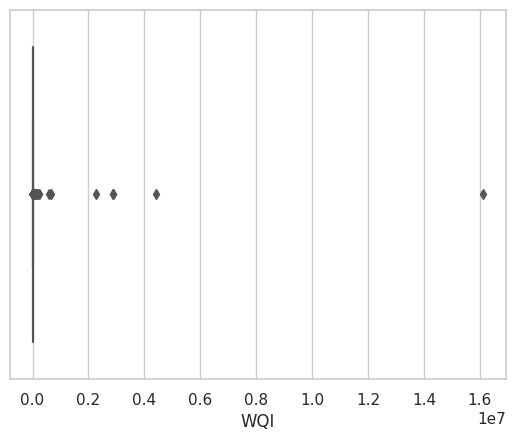

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

# seaborn theme defaults
matplotlib_inline.backend_inline.set_matplotlib_formats('png')
sns.set_theme()
sns.set_style("whitegrid")
sns.set_palette("muted")

def boxplot(feature):
    sns.boxplot(data=df_a,x=feature,orient='h')

boxplot("WQI")

We can see that there is an extreme right skew to the WQI, with significant outliers. This leads to nonsensical values for water quality index. Hence, we remove these extreme outliers. For this, we use the a process described in https://www.researchgate.net/publication/245023815_Outlier_detection_for_skewed_data to determine outliers on the right. 

In [10]:
from statsmodels.stats.stattools import medcouple

MC = float(medcouple(df_a["WQI"]))
q1,q3 = np.percentile(df_a["WQI"],[25,75],method='lower')
iqr = q3 - q1
print(f"{MC = }")
print(f"{q1 = }")
print(f"{q3 = }")
print(f"{iqr = }")

MC = 0.6633915887922653
q1 = 67.427809833375
q3 = 282.21919323541425
iqr = 214.79138340203926


In [11]:
upper_fence = q3 + (1.5*iqr*np.exp(3*MC))
print(upper_fence)

2639.601574110032


In [12]:
df_a = df_a[df_a["WQI"]<upper_fence]
df_a

,STN Code,Year,DO,pH,EC,BOD,NN,FC,TC,WQI
0,1790,2017,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0,65.349937
1,2353,2017,6.35,7.65,815.5,1.80,2.260,20.0,1375.0,62.680699
2,2205,2017,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0,168.236907
3,2206,2017,5.55,7.20,103.5,1.85,0.750,750.0,2800.0,63.521839
4,2557,2017,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0,135.216775
...,...,...,...,...,...,...,...,...,...,...
1389,2544,2022,9.60,7.40,283.0,3.55,0.680,2900.0,6550.0,89.667917
1390,2522,2022,8.00,7.40,31.5,1.40,0.715,116.0,820.0,48.335001
1391,5163,2022,7.35,7.75,387.5,3.75,0.830,1500.0,2400.0,98.127149
1392,2521,2022,7.75,7.35,27.0,1.10,0.735,1685.0,5570.0,50.091416


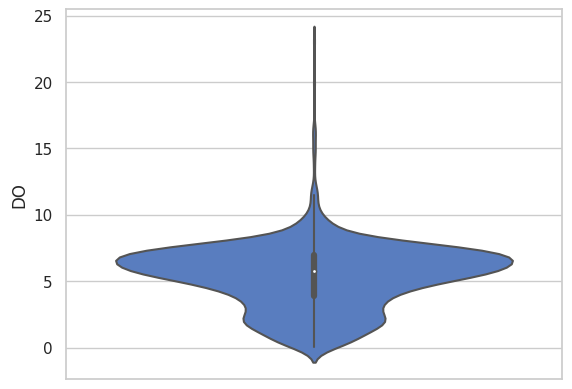

In [13]:
def violinplot(feature):
    sns.violinplot(data=df_a,y=feature,orient='v')
    
violinplot("DO")

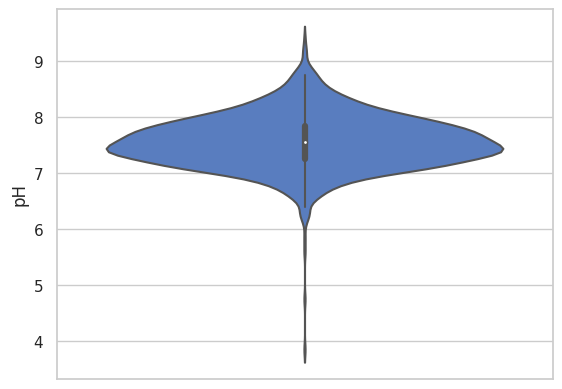

In [14]:
violinplot("pH")

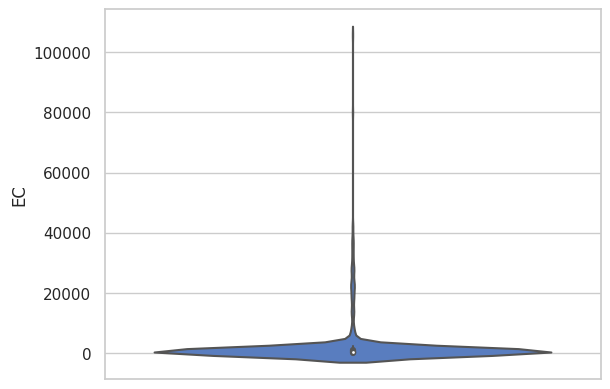

In [15]:
violinplot("EC")

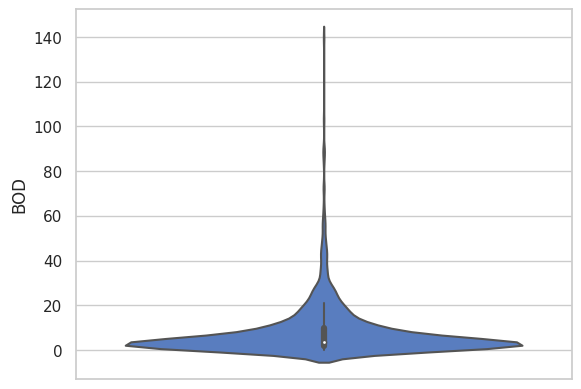

In [16]:
violinplot("BOD")

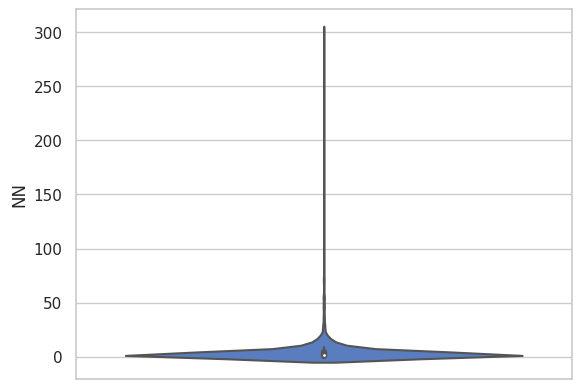

In [17]:
violinplot("NN")

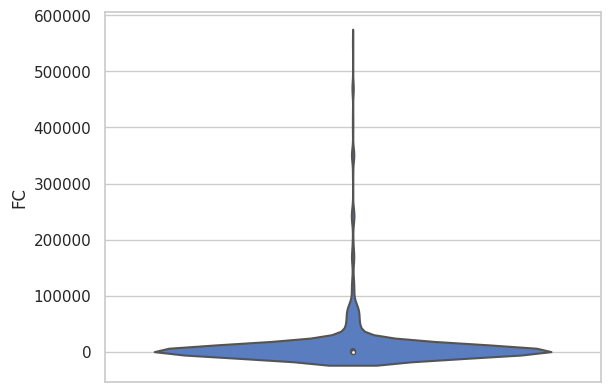

In [18]:
violinplot("FC")

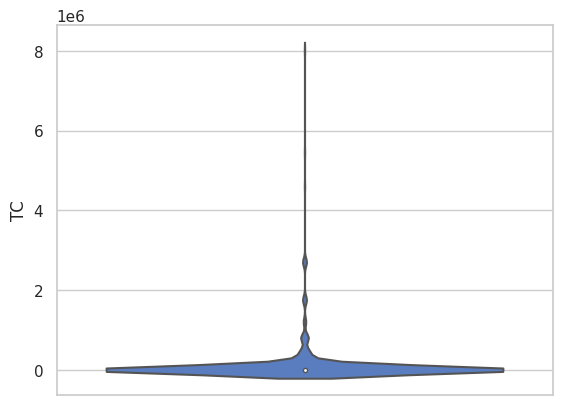

In [19]:
violinplot("TC")

Even after removing extreme values of WQI, we see that most parameters have skewed distributions with outliers. In order to deal with this, we use robust scaling instead of standardizing the data.

In [20]:
counts = [0]*5
counts[0] = len(df_a[df_a["WQI"]<50])
counts[1] = len(df_a[(df_a["WQI"]>=50) & (df_a["WQI"]<100)])
counts[2] = len(df_a[(df_a["WQI"]>=100) & (df_a["WQI"]<200)])
counts[3] = len(df_a[(df_a["WQI"]>=200) & (df_a["WQI"]<300)])
counts[4] = len(df_a[df_a["WQI"]>=300])
print(counts)

[95, 570, 261, 135, 279]


| WQI | Classification | Frequency |
| :-: | :-: | :-: |
| < 50 | Excellent | 95 |
| 50 - 100 | Good | 570 |
| 100 - 200 | Poor | 261 |
| 200 - 300 | Very Poor | 135 |
| > 300 | Unsuitable for Drinking | 279 |

# Predicting WQI with lesser parameters

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

seed = 42
ncols = ["DO","pH","EC","BOD","NN","FC","TC"]
X,y = df_a[ncols],df_a["WQI"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

s = RobustScaler()
X_train_ = s.fit_transform(X_train)
X_test_ = s.transform(X_test)

sdf = pd.DataFrame(X_train_,columns=ncols)
sdf["WQI"] = pd.Series(y_train).values

sdf

,DO,pH,EC,BOD,NN,FC,TC,WQI
0,-1.076923e-01,-0.153846,6.208972,-0.105590,-0.352941,0.155622,0.032469,83.573498
1,-3.384615e-01,-0.692308,0.244747,1.888199,0.140056,4.605416,15.667338,386.865203
2,-1.076923e+00,0.769231,0.562181,0.770186,0.882353,-0.051221,-0.013108,214.186777
3,-4.769231e-01,-0.230769,4.971607,0.031056,-0.443978,0.267581,0.118141,105.412031
4,7.384615e-01,0.615385,-0.386144,-0.242236,-0.112045,0.563711,0.297880,65.733860
...,...,...,...,...,...,...,...,...
1067,-2.769231e-01,-0.230769,-0.042589,0.459627,0.644258,2.329858,13.911073,185.370751
1068,1.230769e-01,0.307692,0.268597,0.099379,-0.201681,0.060458,-0.012679,110.934424
1069,-8.923077e-01,0.307692,0.191936,0.739130,1.120448,-0.053740,-0.029385,204.820249
1070,-2.732857e-16,0.461538,-0.191936,-0.229814,-0.417367,-0.067735,-0.092611,69.012692


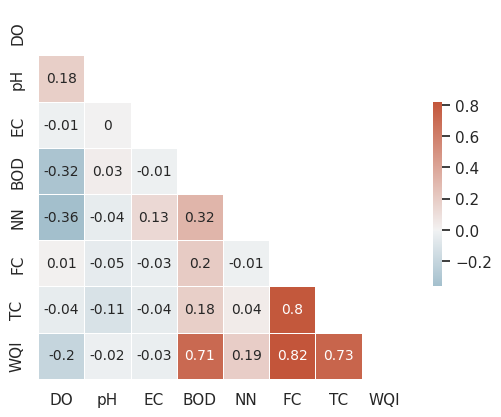

In [22]:
cmatrix = sdf.corr(method='pearson').round(2)
mask = np.triu(np.ones_like(cmatrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cmatrix, mask=mask, cmap=cmap,center=0,
            square=True, linewidths=.5,cbar_kws={"shrink": .5},annot=True,annot_kws={"fontsize":10})
plt.show()

In order to reduce the number of features required for prediction, we can select the features with higher correlation to WQI and lesser inter correlation. Considering the highest correlations, we get BOD,Fecal Coliform and Total Coliform. Since Total Coliform is highly correlated with Fecal Coliform, we replace it with Dissolved Oxygen for our 3rd feature.

In [23]:
selected_features = [0,3,5] # DO,BOD,FC
del_ft = [1,2,4,6]
X_train_ = np.delete(X_train_,del_ft,axis=1)
X_test_ = np.delete(X_test_,del_ft,axis=1)
print(X_train_.shape)

(1072, 3)


# Training Models

### OLS

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

reg = LinearRegression().fit(X_train_,y_train)
y_hat = reg.predict(X_test_)
print(f"RMSE: {mean_squared_error(y_test,y_hat,squared=False)}")
print(f"R2 : {r2_score(y_test,y_hat)}")

RMSE: 54.238413760016996
R2 : 0.965426457011443


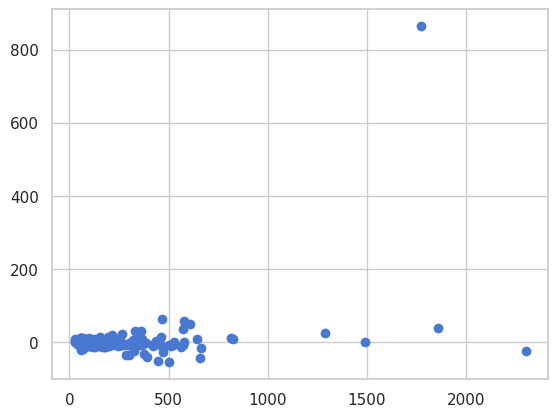

In [25]:
residuals = y_test-y_hat
plt.scatter(y_hat,residuals)
plt.show()

In [26]:
print(reg.coef_)

[-12.32236926 132.64123561   8.14150962]


To repurpose a regression model to classify, we use the previously mentioned WQI to WQC conversion table to convert predicted values for WQI into predicted WQC

Accuracy = 0.917910447761194


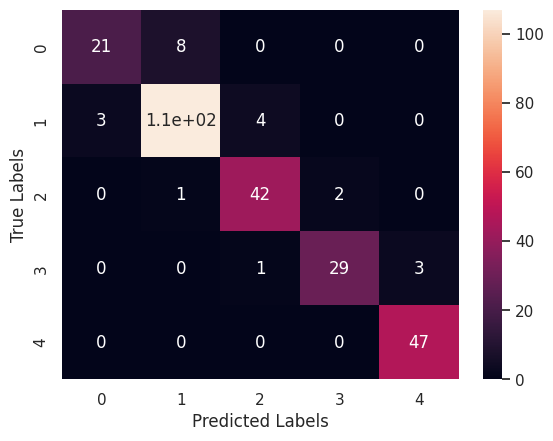

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix

# 0 = Excellent, 1 = Good, 2 = Poor, 3 = Very Poor, 4 = Unsuitable for Drinking
def classify(y):
    y_c = np.zeros_like(y,dtype=int)
    for i in range(len(y)):
        if y[i] < 50:
            y_c[i] = 0
        elif y[i] < 100:
            y_c[i] = 1
        elif y[i] < 200:
            y_c[i] = 2
        elif y[i] < 300:
            y_c[i] = 3
        else:
            y_c[i] = 4
    return y_c

#testing classification accuracy
y_c = classify(y_test.to_numpy())
y_c_hat = classify(y_hat)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat)}')
cm = confusion_matrix(y_c,y_c_hat)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

### Support Vector Regression

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

params = {'C':range(100,1500,100),'epsilon':np.linspace(0.05,0.25,10)}
clf = GridSearchCV(SVR(),params,n_jobs=5)
clf.fit(X_train_,y_train)
reg2 = clf.best_estimator_
y_hat2 = reg2.predict(X_test_)
print(f"RMSE: {mean_squared_error(y_test,y_hat2,squared=False)}")
print(f"R2 : {r2_score(y_test,y_hat2)}")

RMSE: 56.76331271522988
R2 : 0.9621326081802437


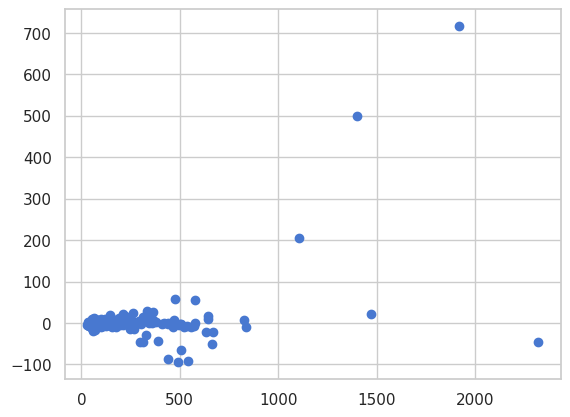

In [29]:
residuals = y_test-y_hat2
plt.scatter(y_hat2,residuals)
plt.show()

Accuracy = 0.9291044776119403


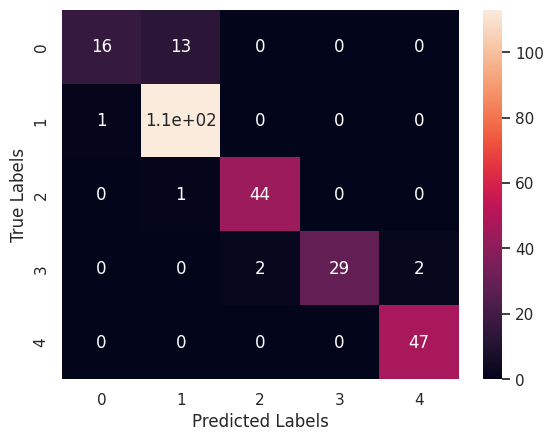

In [30]:
y_c_hat2 = classify(y_hat2)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat2)}')
cm = confusion_matrix(y_c,y_c_hat2)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Classification Models

### Multinomial Logistic Regression

Accuracy = 0.9104477611940298


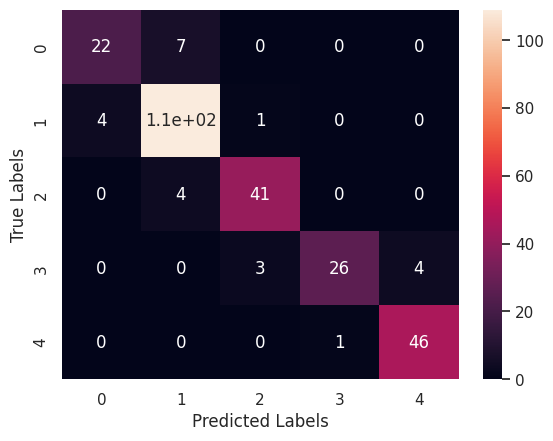

In [34]:
from sklearn.linear_model import LogisticRegression

y_c_train = classify(y_train.to_numpy())
w = {
    0 : 3.5,
    1 : 1,
    2 : 1.2,
    3 : 1.2,
    4 : 1
}
clf = LogisticRegression(random_state=seed,solver='newton-cg',class_weight=w).fit(X_train_,y_c_train)
y_c_hat3 = clf.predict(X_test_)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat3)}')
cm = confusion_matrix(y_c,y_c_hat3)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

### Decision Tree

Accuracy = 0.8992537313432836


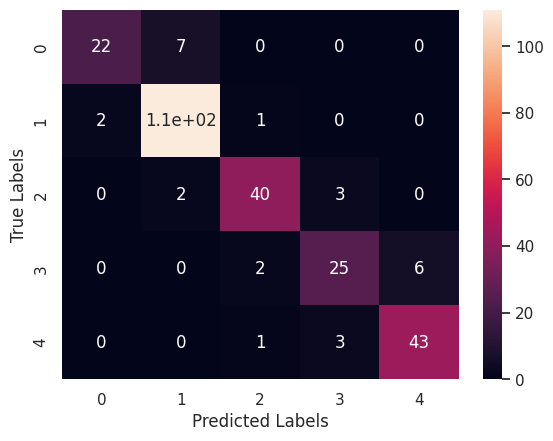

In [35]:
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth':range(3,30)}
clf = GridSearchCV(DecisionTreeClassifier(random_state=seed),params,n_jobs=5)
clf.fit(X_train_,y_c_train)
dt = clf.best_estimator_
y_c_hat4 = dt.predict(X_test_)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat4)}')
cm = confusion_matrix(y_c,y_c_hat4)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

### Feedforward Neural Network

In [36]:
import torch
from torch.utils.data import DataLoader,TensorDataset

def mask(class_arr):
    m = np.zeros((len(class_arr),5),dtype=int)
    for i,v in enumerate(class_arr):
        m[i,v] = 1
    return m

#converting all dataframes to pytorch tensors
X_train_tensor = torch.Tensor(X_train_)
train_target = torch.Tensor(mask(y_c_train))
X_test_tensor = torch.Tensor(X_test_)
test_target = torch.Tensor(mask(y_c))

#grouping training and test data
training_data = TensorDataset(X_train_tensor,train_target)
test_data = TensorDataset(X_test_tensor,test_target)

params = {'batch_size': 16,
          'shuffle': True}
train_loader = DataLoader(training_data,**params)
test_loader = DataLoader(test_data,**params)

print(len(training_data))

1072


In [38]:
from torch import nn

model = nn.Sequential(
    nn.Linear(3,8),
    nn.ELU(),
    nn.Linear(8,8),
    nn.ELU(),
    nn.Linear(8,8),
    nn.ELU(),
    nn.Linear(8,5),
    nn.Softmax(dim=1)
)

print(model)

Sequential(
  (0): Linear(in_features=3, out_features=8, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ELU(alpha=1.0)
  (4): Linear(in_features=8, out_features=8, bias=True)
  (5): ELU(alpha=1.0)
  (6): Linear(in_features=8, out_features=5, bias=True)
  (7): Softmax(dim=1)
)


In [51]:
dummy_run = torch.rand(10,3)
print(model(dummy_run))

tensor([[0.2228, 0.1660, 0.2300, 0.1120, 0.2692],
        [0.2185, 0.1662, 0.2314, 0.1132, 0.2708],
        [0.2102, 0.1688, 0.2303, 0.1091, 0.2817],
        [0.2185, 0.1642, 0.2339, 0.1185, 0.2649],
        [0.2224, 0.1639, 0.2330, 0.1179, 0.2628],
        [0.2241, 0.1649, 0.2299, 0.1138, 0.2674],
        [0.2213, 0.1661, 0.2296, 0.1117, 0.2712],
        [0.2186, 0.1675, 0.2290, 0.1095, 0.2754],
        [0.2142, 0.1682, 0.2282, 0.1085, 0.2808],
        [0.2178, 0.1662, 0.2311, 0.1130, 0.2719]], grad_fn=<SoftmaxBackward0>)


In [52]:
loss_fn = nn.CrossEntropyLoss(weight = torch.Tensor([4,1,1.2,1.2,1]))
opt = torch.optim.Adam(model.parameters(),lr=1e-3)
epochs = 200

def train_loop(dataloader):
    size = len(dataloader.dataset)
    n = len(dataloader)
    avg_loss = 0
    for batch,(x,y_true) in enumerate(dataloader):
        opt.zero_grad()
        y_pred = model(x)
        loss = loss_fn(y_pred,y_true)
        avg_loss += loss.item()
        loss.backward()
        opt.step()
        if (batch+1) % 10 == 0:
            ce_loss = loss.item()
            current = (batch+1)*len(x)
            print(f'loss = {ce_loss}, [{current}/{size}]')
        if batch == n - 1 :
            avg_loss/=n
            return avg_loss
    
def test_loop(dataloader):
    size = len(dataloader.dataset)
    n = len(dataloader)
    test_loss,correct = 0,0
    with torch.no_grad():
        for x,y_true in dataloader:
            y_pred = model(x)
            test_loss += loss_fn(y_pred,y_true).item()
            correct += (y_pred.argmax(1)==y_true.argmax(1)).type(torch.float).sum().item()
    test_loss /= n
    correct /= size
    print(f'Test Loss = {test_loss} ; Test Accuracy = {correct}')
    return test_loss
            
train_losses = []
test_losses = []
    
for epoch in range(epochs):
    print(f'Epoch {epoch+1}')
    avg_train_loss = train_loop(train_loader)
    if (epoch+1)%10 == 0:
        test_losses.append(test_loop(test_loader))
        train_losses.append(avg_train_loss)
    print()

loss_fn = nn.CrossEntropyLoss(weight = torch.Tensor([3,1,1.2,1.2,1]))

for epoch in range(epochs):
    print(f'Epoch {epoch+1}')
    avg_train_loss = train_loop(train_loader)
    if (epoch+1)%10 == 0:
        test_losses.append(test_loop(test_loader))
        train_losses.append(avg_train_loss)
    print()

Epoch 1
loss = 1.7744866609573364, [160/1072]
loss = 1.9684890508651733, [320/1072]
loss = 1.6530619859695435, [480/1072]
loss = 1.6795685291290283, [640/1072]
loss = 1.6638044118881226, [800/1072]
loss = 1.6320308446884155, [960/1072]

Epoch 2
loss = 2.1757428646087646, [160/1072]
loss = 2.0181007385253906, [320/1072]
loss = 1.7607500553131104, [480/1072]
loss = 2.112902879714966, [640/1072]
loss = 1.9540634155273438, [800/1072]
loss = 1.718784213066101, [960/1072]

Epoch 3
loss = 2.172391414642334, [160/1072]
loss = 1.5711885690689087, [320/1072]
loss = 2.0265092849731445, [480/1072]
loss = 2.24642276763916, [640/1072]
loss = 1.4829652309417725, [800/1072]
loss = 2.3996694087982178, [960/1072]

Epoch 4
loss = 1.8489806652069092, [160/1072]
loss = 1.7641730308532715, [320/1072]
loss = 1.3793911933898926, [480/1072]
loss = 2.120392322540283, [640/1072]
loss = 1.5725728273391724, [800/1072]
loss = 1.8631150722503662, [960/1072]

Epoch 5
loss = 1.7032971382141113, [160/1072]
loss = 1.644

loss = 1.1797301769256592, [240/844]
loss = 1.2651914358139038, [320/844]
loss = 1.331323266029358, [400/844]
loss = 1.4068683385849, [480/844]
loss = 1.0300066471099854, [560/844]
loss = 1.5221424102783203, [640/844]
loss = 1.2137582302093506, [720/844]
loss = 1.1634219884872437, [800/844]

Epoch 158
loss = 1.712309718132019, [80/844]
loss = 1.1986024379730225, [160/844]
loss = 1.196284294128418, [240/844]
loss = 1.112382173538208, [320/844]
loss = 1.0079755783081055, [400/844]
loss = 1.344561219215393, [480/844]
loss = 1.7246577739715576, [560/844]
loss = 0.990241527557373, [640/844]
loss = 1.4152090549468994, [720/844]
loss = 1.33279287815094, [800/844]

Epoch 159
loss = 0.9659156799316406, [80/844]
loss = 1.2531026601791382, [160/844]
loss = 1.4272503852844238, [240/844]
loss = 1.0159547328948975, [320/844]
loss = 1.397007703781128, [400/844]
loss = 0.9998732805252075, [480/844]
loss = 1.3961749076843262, [560/844]
loss = 1.5168949365615845, [640/844]
loss = 1.6570117473602295, [72

loss = 1.03501558303833, [240/844]
loss = 1.0458228588104248, [320/844]
loss = 1.2641754150390625, [400/844]
loss = 0.9693204164505005, [480/844]
loss = 1.7460877895355225, [560/844]
loss = 1.1777929067611694, [640/844]
loss = 0.9900532960891724, [720/844]
loss = 1.1447758674621582, [800/844]
Test Loss = 1.2153097646577018 ; Test Accuracy = 0.9241706161137441

Epoch 181
loss = 1.3757100105285645, [80/844]
loss = 1.214278221130371, [160/844]
loss = 1.2423328161239624, [240/844]
loss = 1.1809667348861694, [320/844]
loss = 1.2928881645202637, [400/844]
loss = 1.1269609928131104, [480/844]
loss = 1.5168051719665527, [560/844]
loss = 0.9859752655029297, [640/844]
loss = 1.5907435417175293, [720/844]
loss = 1.3817198276519775, [800/844]

Epoch 182
loss = 1.0153107643127441, [80/844]
loss = 1.3277937173843384, [160/844]
loss = 1.1613150835037231, [240/844]
loss = 1.1563676595687866, [320/844]
loss = 1.6590521335601807, [400/844]
loss = 1.3910561800003052, [480/844]
loss = 1.200046420097351, [

loss = 1.3808330297470093, [480/844]
loss = 1.3249279260635376, [560/844]
loss = 1.9042649269104004, [640/844]
loss = 1.0596131086349487, [720/844]
loss = 1.1232324838638306, [800/844]

Epoch 203
loss = 1.3821738958358765, [80/844]
loss = 1.1456458568572998, [160/844]
loss = 1.029653787612915, [240/844]
loss = 1.4775736331939697, [320/844]
loss = 1.4273439645767212, [400/844]
loss = 1.1049803495407104, [480/844]
loss = 1.3913453817367554, [560/844]
loss = 1.5095700025558472, [640/844]
loss = 1.1251240968704224, [720/844]
loss = 1.2046034336090088, [800/844]

Epoch 204
loss = 1.2500959634780884, [80/844]
loss = 1.0558717250823975, [160/844]
loss = 1.212175965309143, [240/844]
loss = 1.2326486110687256, [320/844]
loss = 1.177051067352295, [400/844]
loss = 1.3179340362548828, [480/844]
loss = 1.2197842597961426, [560/844]
loss = 1.3479547500610352, [640/844]
loss = 1.0234225988388062, [720/844]
loss = 1.1913496255874634, [800/844]

Epoch 205
loss = 1.0226478576660156, [80/844]
loss = 1.29

loss = 1.341100811958313, [320/844]
loss = 1.5997278690338135, [400/844]
loss = 1.0467387437820435, [480/844]
loss = 2.1160099506378174, [560/844]
loss = 1.5629421472549438, [640/844]
loss = 1.353947639465332, [720/844]
loss = 1.3770703077316284, [800/844]

Epoch 225
loss = 1.0735722780227661, [80/844]
loss = 0.981637179851532, [160/844]
loss = 1.3600568771362305, [240/844]
loss = 1.2514715194702148, [320/844]
loss = 1.069580316543579, [400/844]
loss = 1.1301766633987427, [480/844]
loss = 1.3600523471832275, [560/844]
loss = 1.2795426845550537, [640/844]
loss = 1.3711621761322021, [720/844]
loss = 1.1842072010040283, [800/844]

Epoch 226
loss = 1.3014832735061646, [80/844]
loss = 1.2458704710006714, [160/844]
loss = 1.4037408828735352, [240/844]
loss = 1.1127638816833496, [320/844]
loss = 0.9995595216751099, [400/844]
loss = 1.2199370861053467, [480/844]
loss = 1.1232277154922485, [560/844]
loss = 1.3352047204971313, [640/844]
loss = 1.2712492942810059, [720/844]
loss = 1.8060238361358

loss = 1.0153456926345825, [800/844]

Epoch 246
loss = 1.6981351375579834, [80/844]
loss = 1.6620508432388306, [160/844]
loss = 1.1474334001541138, [240/844]
loss = 1.4232873916625977, [320/844]
loss = 1.172229290008545, [400/844]
loss = 0.9492244124412537, [480/844]
loss = 1.2771152257919312, [560/844]
loss = 1.1149872541427612, [640/844]
loss = 1.6128953695297241, [720/844]
loss = 1.2250754833221436, [800/844]

Epoch 247
loss = 1.5717625617980957, [80/844]
loss = 1.0099735260009766, [160/844]
loss = 1.565011739730835, [240/844]
loss = 1.4748144149780273, [320/844]
loss = 1.1199264526367188, [400/844]
loss = 1.0883374214172363, [480/844]
loss = 1.024862289428711, [560/844]
loss = 1.267590045928955, [640/844]
loss = 1.7615357637405396, [720/844]
loss = 1.7744128704071045, [800/844]

Epoch 248
loss = 1.6059616804122925, [80/844]
loss = 1.3605517148971558, [160/844]
loss = 1.5025606155395508, [240/844]
loss = 1.4660555124282837, [320/844]
loss = 1.2825953960418701, [400/844]
loss = 1.235

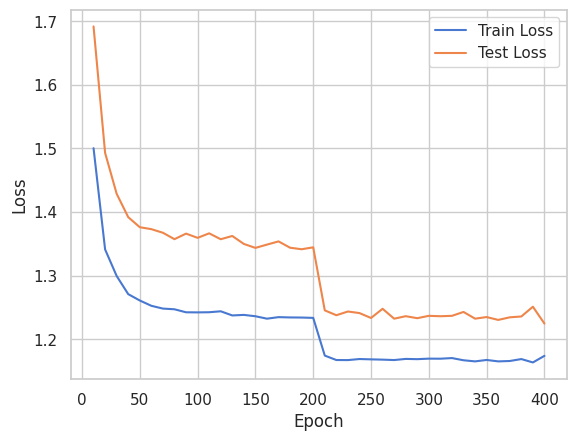

In [53]:
epoch_count = list(range(10,2*epochs+1,10))
plt.plot(epoch_count,train_losses,label='Train Loss')
plt.plot(epoch_count,test_losses,'-',label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [56]:
torch.save(model.state_dict(),"/home/pc/main/python/wqi-prediction/fcnn_state.pth")

In [41]:
#Load from saved file after first attempt instead of retraining entire model

model = nn.Sequential(
    nn.Linear(3,8),
    nn.ELU(),
    nn.Linear(8,8),
    nn.ELU(),
    nn.Linear(8,8),
    nn.ELU(),
    nn.Linear(8,5),
    nn.Softmax(dim=1)
)
model.load_state_dict(torch.load("/home/pc/main/python/wqi-prediction/fcnn_state.pth"))

<All keys matched successfully>

Accuracy = 0.9253731343283582


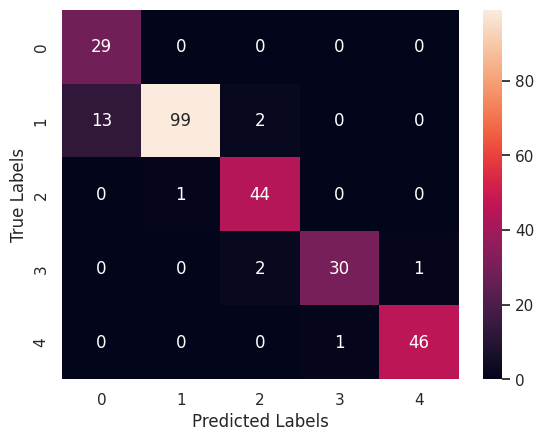

In [44]:
y_c_hat5 = model(X_test_tensor).argmax(1).detach().cpu().numpy()
print(f'Accuracy = {accuracy_score(y_c,y_c_hat5)}')
cm = confusion_matrix(y_c,y_c_hat5)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Comparison of Models

In [45]:
from sklearn.metrics import f1_score,cohen_kappa_score

preds = [y_c_hat,y_c_hat2,y_c_hat3,y_c_hat4,y_c_hat5]
labels = ['OLS','SVR','MLR','DT','ANN']
metrics = ['F1 Score','Kappa','Accuracy']
f1_scores = []
kappas = []
accuracies = []

for pred in preds:
    f1_scores.append(f1_score(y_c,pred,average='macro'))
    kappas.append(cohen_kappa_score(y_c,pred))
    accuracies.append(accuracy_score(y_c,pred))

d = {
    'F1 Score' : f1_scores,
    'Kappa' : kappas,
    'Accuracy' : accuracies
}
score_df = pd.DataFrame(data=d,index=labels)

score_df

,F1 Score,Kappa,Accuracy
OLS,0.902251,0.887515,0.917910
SVR,0.903019,0.901170,0.929104
MLR,0.891571,0.876602,0.910448
DT,0.870973,0.861225,0.899254
ANN,0.920919,0.900398,0.925373


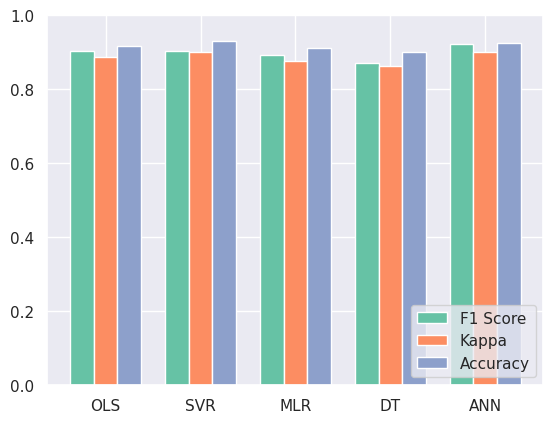

In [46]:
sns.set_palette(sns.color_palette("Set2"))
sns.set_style('darkgrid')

x = np.arange(len(labels))
width = 0.25 
multiplier = 0

fig, ax = plt.subplots()
for attr, val in d.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, val, width, label=attr)
    multiplier += 1

ax.set_xticks(x + width, labels)
ax.legend(loc='lower right')
ax.set_ylim(0, 1)

plt.show()